# M4L1 Screencasts

## M4L1SC1 Getting Started with Reinforcement Learning: Agents, Actions, and Rewards

## Step 1: Creating Our Grid World

In [1]:
import numpy as np
import random
from typing import Tuple, List
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, size: int = 5):
        self.size = size
        self.state = (0, 0)  # Starting position
        self.goal = (size-1, size-1)  # Goal position
        self.reset()

        # Define possible actions
        self.actions = ["up", "down", "left", "right"]

    def reset(self) -> Tuple[int, int]:
        """Reset the environment to initial state"""
        self.state = (0, 0)
        return self.state

    def make_move(self, action: str) -> Tuple[Tuple[int, int], float, bool]:
        """Execute action and return new state, reward, and done flag"""
        x, y = self.state

        # Update position based on action
        if action == "right" and x < self.size - 1:
            x += 1
        elif action == "left" and x > 0:
            x -= 1
        elif action == "down" and y < self.size - 1:
            y += 1
        elif action == "up" and y > 0:
            y -= 1

        self.state = (x, y)

        # Calculate reward
        reward = -0.1  # Small negative reward for each move
        done = False

        if self.state == self.goal:
            reward = 1.0  # Positive reward for reaching goal
            done = True

        return self.state, reward, done

    def get_valid_actions(self) -> List[str]:
        """Return list of valid actions for current state"""
        x, y = self.state
        valid = []

        if x < self.size - 1:
            valid.append("right")
        if x > 0:
            valid.append("left")
        if y < self.size - 1:
            valid.append("down")
        if y > 0:
            valid.append("up")

        return valid

## Step 2: Creating a Random Agent

In [2]:
class RandomAgent:
    """Agent that selects random actions"""
    def __init__(self, env: GridWorld):
        self.env = env

    def select_action(self) -> str:
        return random.choice(self.env.get_valid_actions())

## Step 3: Creating a Greedy Agent


In [3]:
class GreedyAgent:
    """Agent that selects actions to move closer to goal"""
    def __init__(self, env: GridWorld):
        self.env = env

    def select_action(self) -> str:
        current_x, current_y = self.env.state
        goal_x, goal_y = self.env.goal
        valid_actions = self.env.get_valid_actions()

        # Prefer moving horizontally or vertically towards goal
        if current_x < goal_x and "right" in valid_actions:
            return "right"
        if current_x > goal_x and "left" in valid_actions:
            return "left"
        if current_y < goal_y and "down" in valid_actions:
            return "down"
        if current_y > goal_y and "up" in valid_actions:
            return "up"

        return random.choice(valid_actions)

## Step 4: Running the Game

In [4]:
def run_episode(env: GridWorld, agent, max_steps: int = 100) -> Tuple[float, int]:
    """Run one episode and return total reward and steps taken"""
    state = env.reset()
    total_reward = 0
    steps = 0

    for step in range(max_steps):
        action = agent.select_action()
        state, reward, done = env.make_move(action)
        total_reward += reward
        steps += 1

        if done:
            break

    return total_reward, steps

# Visualization function
def visualize_path(env: GridWorld, agent, max_steps: int = 100):
    """Visualize agent's path through the grid"""
    path = [(0, 0)]  # Start position
    state = env.reset()

    for _ in range(max_steps):
        action = agent.select_action()
        state, reward, done = env.make_move(action)
        path.append(state)

        if done:
            break

    # Create grid
    plt.figure(figsize=(8, 8))
    plt.grid(True)
    plt.xticks(range(env.size))
    plt.yticks(range(env.size))

    # Plot path
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], 'b-o', label='Agent Path')

    # Mark start and goal
    plt.plot(0, 0, 'go', label='Start', markersize=15)
    plt.plot(env.size-1, env.size-1, 'ro', label='Goal', markersize=15)

    plt.legend()
    plt.title(f'Agent Path ({type(agent).__name__})')
    plt.show()

## Step 5: Visualizing the results

Testing Random Agent:
Total reward: -2.50, Steps: 36


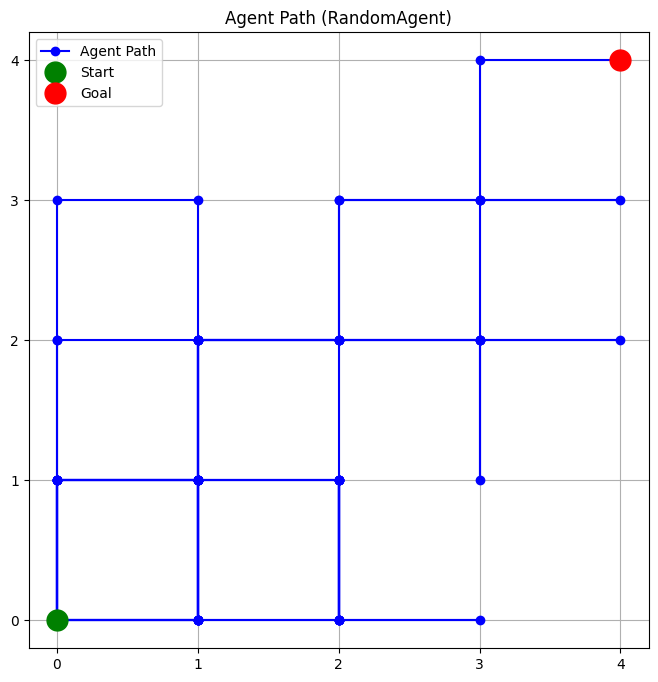


Testing Greedy Agent:
Total reward: 0.30, Steps: 8


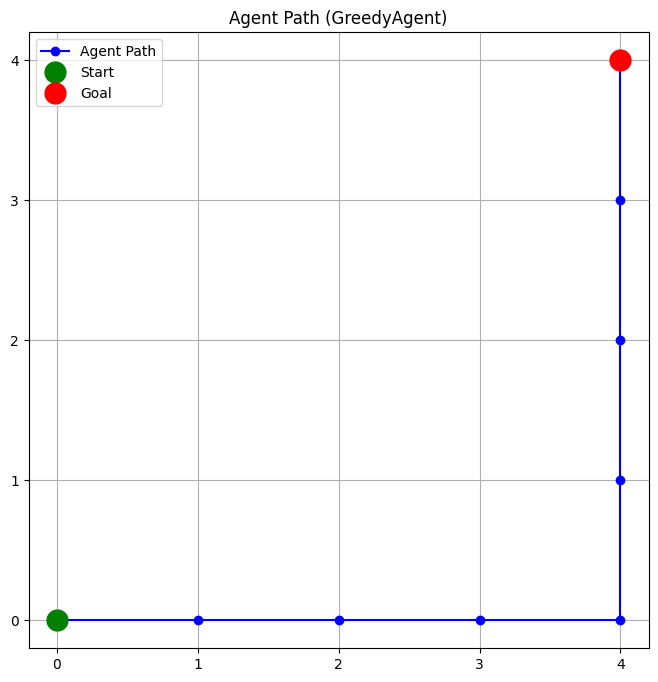

In [ ]:
# Example usage
if __name__ == "__main__":
    env = GridWorld(size=5)

    # Compare Random and Greedy agents
    random_agent = RandomAgent(env)
    greedy_agent = GreedyAgent(env)

    print("Testing Random Agent:")
    reward, steps = run_episode(env, random_agent)
    print(f"Total reward: {reward:.2f}, Steps: {steps}")
    visualize_path(env, random_agent)

    print("\nTesting Greedy Agent:")
    reward, steps = run_episode(env, greedy_agent)
    print(f"Total reward: {reward:.2f}, Steps: {steps}")
    visualize_path(env, greedy_agent)

## M4L1SC2: Simulating a Reinforcement Learning Loop in Python

### Step 1: Setting Up Our Grid World
Set up the GridWorld environment in Python, ensuring a clear simulation space.

In [5]:
import numpy as np

class GridWorld:
    def __init__(self, size=5, start=(0, 0), goal=(4, 4)):
        self.size = size
        self.state = start
        self.goal = goal

    def reset(self):
        self.state = (0, 0)
        return self.state

    def is_goal_reached(self):
        return self.state == self.goal

    def step(self, action):
        x, y = self.state
        if action == "right" and x < self.size - 1:
            x += 1
        elif action == "down" and y < self.size - 1:
            y += 1
        self.state = (x, y)
        reward = 1 if self.is_goal_reached() else -0.04
        return self.state, reward

### Step 2: Defining Agent Actions and Policies
Define basic actions and a randomized policy for the agent's motion.

In [ ]:
actions = ["right", "down"]

def random_policy():
    return np.random.choice(actions)

### Step 3: Implementing the Learning Loop
Implement the reinforcement learning loop, simulating agent exploration.

In [ ]:
env = GridWorld()
num_episodes = 10

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    step_count = 0
    while not env.is_goal_reached():
        action = random_policy()
        state, reward = env.step(action)
        total_reward += reward
        step_count += 1
    print(f"Episode {episode + 1}: Total Reward: {total_reward}, Steps Taken: {step_count}")

Episode 1: Total Reward: 0.72, Steps Taken: 8
Episode 2: Total Reward: 0.6799999999999999, Steps Taken: 9
Episode 3: Total Reward: 0.56, Steps Taken: 12
Episode 4: Total Reward: 0.6799999999999999, Steps Taken: 9
Episode 5: Total Reward: 0.64, Steps Taken: 10
Episode 6: Total Reward: 0.72, Steps Taken: 8
Episode 7: Total Reward: 0.44000000000000006, Steps Taken: 15
Episode 8: Total Reward: 0.52, Steps Taken: 13
Episode 9: Total Reward: 0.6799999999999999, Steps Taken: 9
Episode 10: Total Reward: 0.72, Steps Taken: 8
